### Student Information
Name: 葉之晴 Jhih-Ching Yeh

Student ID: 110065504

GitHub ID: jhih-ching-yeh

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

---

<font size=6 color=#428785 > **Data Mining Lab 1 Solutiion**

<font size=6 color=#6DD0CD > **Part 1** 

<font size=3 color=#6DD0CD >
Take home exercises in the DM2021-Lab1-master Repo

    
( The first line is `"# Answer here"` in every answer cell. )

## Table of Contents
1. Data Source
2. Data Preparation
    - Exercise 1
3. Data Transformation
    - Exercise 2 (take home)
    - Exercise 3
4. Data Mining using Pandas
    - Exercise 4
    - Exercise 5 (take home)
5. Data Preprocessing
    - Exercise 6 (take home)
    - Exercise 7
    - Exercise 8 (take home)
    - Exercise 9
    - Exercise 10 (take home)
    - Exercise 11 (take home)
    - Exercise 12 (take home)
    - Exercise 13 (take home)
    - Exercise 14 (take home)
    - Exercise 15 (take home)
    - Exercise 16 (take home)


---

## 1. The Data

In [1]:
# Download packages
!pip install plotly
!pip install plotly --upgrade
!pip install chart_studio

You should consider upgrading via the '/Users/jhihchingyeh/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/jhihchingyeh/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/jhihchingyeh/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
# import packages
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.decomposition import PCA
import plotly
import plotly as py
import plotly.graph_objs as go
import chart_studio
import plotly.offline as pyo
from plotly.offline import iplot
import plotly.figure_factory as ff
import math
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

# import my functions
import helpers.data_mining_helpers as dmh

---

## 2. Data Preparation

In [3]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [4]:
# obtain the documents containing the categories provided
twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

### **>>> Exercise 1 (5 min):**  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [5]:
# Answer here
for t in twenty_train.data[:3]:
    print(t)

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

---

## 3. Data Transformation

In [6]:
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [7]:
# add category to the dataframe
X['category'] = twenty_train.target

In [8]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [9]:
X[0:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [10]:
# Answer here
# find data which X["category"] > 2 by using query
X.query('category > 2')

,text,category,category_name
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
...,...,...,...
2229,From: jcj@tellabs.com (jcj) Subject: Re: proof...,3,soc.religion.christian
2230,From: news@cbnewsk.att.com Subject: Re: Bible ...,3,soc.religion.christian
2246,From: lmvec@westminster.ac.uk (William Hargrea...,3,soc.religion.christian
2247,From: daniels@math.ufl.edu (TV's Big Dealer) S...,3,soc.religion.christian


### **>>> Exercise 3 (5 min):**  
Try to fecth records belonging to the ```comp.graphics``` category, and query every 10th record. Only show the first 5 records.

In [11]:
# Answer here
X.loc[lambda f: f.category_name == 'sci.med'].iloc[::10, :][0:5]

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
82,From: jason@ab20.larc.nasa.gov (Jason Austin) ...,2,sci.med
118,From: rogers@calamari.hi.com (Andrew Rogers) S...,2,sci.med
142,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...,2,sci.med


---

## 4. Data Mining using Pandas

### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [12]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

In [13]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]

In [14]:
X = X.append(dummy_dict, ignore_index=True)

In [15]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [16]:
X.dropna(inplace=True)

In [17]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [18]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [19]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [20]:
# Answer here

"""
For function of isnull(), there are only np.nan, None, or completely blank considered missing data.
On the other side, the column where id is "C" and id is "D", their data of 'NaN' and 'None' will be regarded as string by the computer. 
Also, the column where id is "F,'' its data of '' will be regarded as a value with a blank key. 
Therefore, they won't be seen as missing data and isnull() function won't work.
"""

'\nFor function of isnull(), there are only np.nan, None, or completely blank considered missing data.\nOn the other side, the column where id is "C" and id is "D", their data of \'NaN\' and \'None\' will be regarded as string by the computer. \nAlso, the column where id is "F,\'\' its data of \'\' will be regarded as a value with a blank key. \nTherefore, they won\'t be seen as missing data and isnull() function won\'t work.\n'

---

## 5.  Data Preprocessing

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [21]:
# Answer here

"""
From cell above, we can notice there is not any different from initial X and X after sample.
Then, X_sample is random choose from X, so index is not sorting.
And X_sample will not change X value.

This result can be proved by the following code.
"""

'\nFrom cell above, we can notice there is not any different from initial X and X after sample.\nThen, X_sample is random choose from X, so index is not sorting.\nAnd X_sample will not change X value.\n\nThis result can be proved by the following code.\n'

In [22]:
# Answer here
# Copy initial X by using to compare
X_initial = X

# Random State
X_sample = X.sample(n=1000) 

In [23]:
# Answer here
# Compare X_initial and X after .sample
diff = False


for i in range(len(X)):
    if(X_initial["text"][i] != X["text"][i]):
        print("text", i)
        diff = True
    if(X_initial["category"][i] != X["category"][i]):
        print("category", i)
        diff = True
    if(X_initial["category_name"][i] != X["category_name"][i]):
        print("category_name", i)
        diff = True

if (diff == True):
    print("There are some different")
else:
    print("There isn't any different")

There isn't any different


In [24]:
# Answer here
X_initial[0:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


In [25]:
# Answer here
X[0:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


In [26]:
# Answer here
X_sample[0:10]

,text,category,category_name
1826,From: mathew <mathew@mantis.co.uk> Subject: Re...,0,alt.atheism
1401,From: david@stat.com (David Dodell) Subject: H...,2,sci.med
959,From: Desiree_Bradley@mindlink.bc.ca (Desiree ...,3,soc.religion.christian
223,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
1908,From: geoffrey@cosc.canterbury.ac.nz (Geoff Th...,1,comp.graphics
2224,"From: havardn@edb.tih.no (Haavard Nesse,o92a) ...",1,comp.graphics
1445,From: georgec@eng.umd.edu (George B. Clark) Su...,2,sci.med
1315,From: wjhovi01@ulkyvx.louisville.edu Subject: ...,3,soc.religion.christian
605,From: jcherney@envy.reed.edu (Joel Alexander C...,2,sci.med
400,From: nfotis@ntua.gr (Nick C. Fotis) Subject: ...,1,comp.graphics


### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

sci.med                   292
soc.religion.christian    258
comp.graphics             244
alt.atheism               206
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

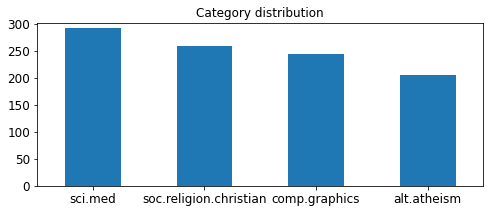

In [27]:
# Answer here
upper_bound = max(X_sample.category_name.value_counts()) + 10

print(X_sample.category_name.value_counts())
# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

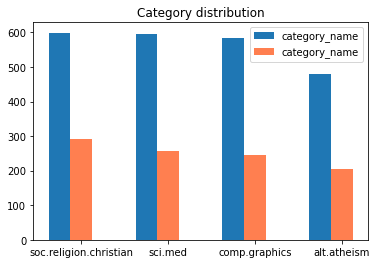

In [28]:
# Answer here

bar1 = X.category_name.value_counts()
bar2 = X_sample.category_name.value_counts()
index = np.arange(4)
    
plt.bar(index,bar1.tolist(), label='category_name', width=0.25)
plt.bar(index+0.25, bar2.tolist(), label='category_name', width=0.25, color= 'coral')
plt.xticks(index+0.25, ['soc.religion.christian', 'sci.med', 'comp.graphics','alt.atheism'])
plt.title("Category distribution")
plt.legend()

plt.show()

In [29]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [30]:
X[0:4]

,text,category,category_name,unigrams
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co..."
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B...."
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ..."
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ..."


In [31]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [32]:
# Answer here
analyze = count_vect.build_analyzer()
analyze(" ".join(list(X[:1].text)))

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [33]:
# Answer here
# Check the second one
order = 0
# choose the fifth record
fifRec = X_counts[4:5,0:100].toarray()

for i in range(100):
    if(fifRec[0][i] == 1):
        order = order + 1   
    if(fifRec[0][i] == 1 and order ==2):
        print("The word is", count_vect.get_feature_names()[i])
        break

The word is 01


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

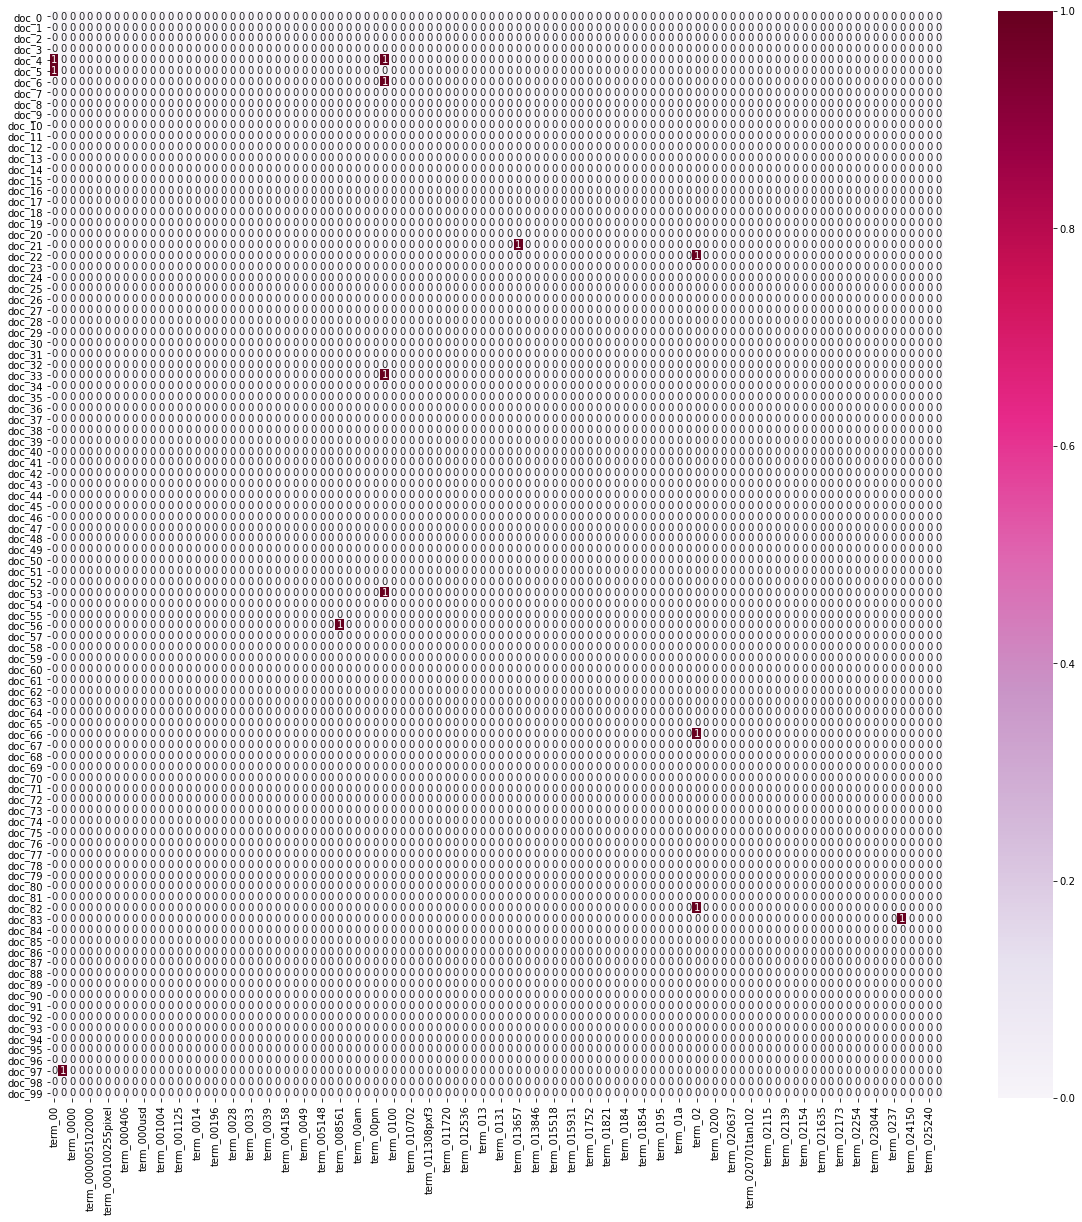

In [34]:
# Answer here
# x,y,z
plot_x_all = ["term_" + str(i) for i in count_vect.get_feature_names()[0:100]]
plot_y_all = ["doc_" + str(i) for i in list(X.index)[0:100]]
plot_z_all = X_counts[0:100, 0:100].toarray()

# plot
df_all_todraw = pd.DataFrame(plot_z_all, columns = plot_x_all, index = plot_y_all)
plt.subplots(figsize=(20, 20))
ax = sns.heatmap(df_all_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

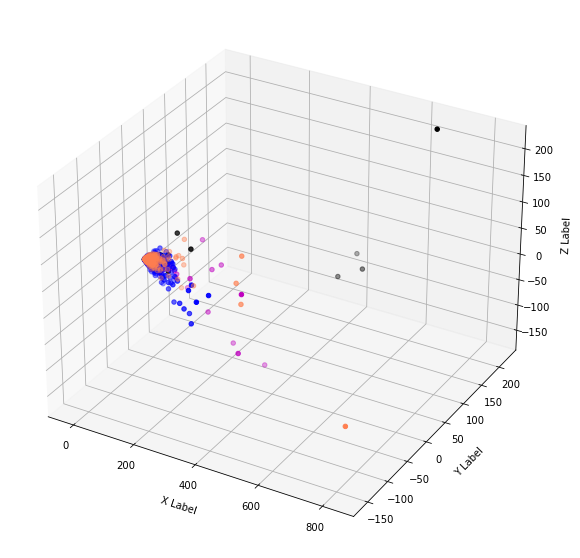

In [35]:
# Answer here
from mpl_toolkits.mplot3d import Axes3D

X_3dim = PCA(n_components = 3).fit_transform(X_counts.toarray())

# plot
col = ['coral', 'blue', 'black', 'm']

fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(111, projection='3d')


for c, category in zip(col, categories):
    xs = X_3dim[X['category_name'] == category].T[0]
    ys = X_3dim[X['category_name'] == category].T[1]
    zs = X_3dim[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [ ]:
# Answer here
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
    
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# Cconstruct the df with term and frequencies
df_term_frequencies = pd.DataFrame(columns = ["term", "frequencies"]) 

for i in range(300):
    df_term_frequencies.loc[i, "term"] = str(count_vect.get_feature_names()[i])
    df_term_frequencies.loc[i, "frequencies"] = int(term_frequencies[i])
    
# plotly interactive visualization
term = df_term_frequencies.term
plotly_data = [go.Bar(x=df_term_frequencies.term, y=df_term_frequencies.frequencies)]
layout = go.Layout(font={'size':3,'family':'sans-serif'})
fig = go.Figure(data=plotly_data, layout=layout)
plotly.offline.init_notebook_mode()
plotly.offline.iplot(fig,filename='basic-scatter')

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [ ]:
# Answer here
# Screening by the frequency of the term > 15
# Time Complexity of Screening by this function only O(1)
df_reduce = df_term_frequencies[df_term_frequencies["frequencies"]>15]

# plotly interactive visualization
reduce_data = [go.Bar(x=df_reduce.term, y=df_reduce.frequencies)]
reduce_layout = go.Layout(title='Interactive Visualization Figure by plotly', font={'size':10,'family':'sans-serif'})
reduce_fig = go.Figure(data=reduce_data, layout=reduce_layout)
plotly.offline.init_notebook_mode()
plotly.offline.iplot(reduce_fig,filename='basic-scatter')

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [ ]:
# Answer here
# Sort the terms on the x-axis by frequency
df_sort = df_term_frequencies.sort_values('frequencies', ascending = False)

# plotly interactive visualization
term = df_sort.term
plotly_data = [go.Bar(x=df_sort.term, y=df_sort.frequencies)]
layout = go.Layout(font={'size':3,'family':'sans-serif'})
fig = go.Figure(data=plotly_data, layout=layout)
plotly.offline.init_notebook_mode()
plotly.offline.iplot(fig,filename='basic-scatter')

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [ ]:
# Answer here

"""
Yes, it worked.
However, because category is that category_name converted to dummy code, 
bin_category and bin_categoryNameare are the same meaning and the same value.

This results can be proved by the following code.
"""

In [ ]:
# Answer here
mlb = preprocessing.LabelBinarizer()

mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()

mlb.fit(X.category_name)
X['bin_categoryName'] = mlb.transform(X['category_name']).tolist()

In [ ]:
# Answer here
X[0:9]

---

<font size=6 color=#6DD0CD > **Part 2** 

<font size=3 color=#6DD0CD >
Follow the same process from the DM2021-Lab1-master Repo on the new dataset.
    
( The first line is `"# Answer here"` in every answer cell. )

## Description
- Abstract: The dataset contains sentences labelled with positive or negative sentiment.
- Source: Dimitrios Kotzias dkotzias@ics.uci.edu
- Data Set Information:
    - This dataset was created for the Paper 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015. 
    - It contains sentences labelled with positive or negative sentiment. Score is either 1 (for positive) or 0 (for negative). 
    - The sentences come from three different websites/fields:
        - imdb.com
        - amazon.com
        - yelp.com
- Reference: https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#

## Table of Contents
1. Data Source
2. Data Preparation
    - Exercise 1
3. Data Transformation
    - Exercise 2 (take home)
    - Exercise 3
4. Data Mining using Pandas
    - Exercise 4
    - Exercise 5 (take home)
5. Data Preprocessing
    - Exercise 6 (take home)
    - Exercise 7
    - Exercise 8 (take home)
    - Exercise 9
    - Exercise 10 (take home)
    - Exercise 11 (take home)
    - Exercise 12 (take home)
    - Exercise 13 (take home)
    - Exercise 14 (take home)
    - Exercise 15 (take home)
    - Exercise 16 (take home)
6. Data Exploration

## 1. The Data

In [ ]:
# import packages
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.decomposition import PCA
import plotly
import plotly as py
import plotly.graph_objs as go
import chart_studio
import plotly.offline as pyo
from plotly.offline import iplot
import plotly.figure_factory as ff
import math
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity

# import my functions
import helpers.data_mining_helpers as dmh

---

## 2. Data Preparation
In this demonstration we are only going to look at 3 companies. This means we will not make use of the complete dataset, but only a subset of it, which includes the Amazon, Yelp and IMDb companies

In [ ]:
# path
path = r'/Users/jhihchingyeh/DMLab1/DM2021-Lab1-master/sentiment labelled sentences/'

# file names
fileNames = ['amazon_cells_labelled.txt', 'yelp_labelled.txt', 'imdb_labelled.txt']

# categories
companies = ['Amazon', 'Yelp', 'IMDb']

In [ ]:
# Read data
amazon = pd.read_table(path + fileNames[0], header=None, names=["text", "label"]) 
yelp = pd.read_table(path + fileNames[1], header=None, names=["text", "label"]) 
imdb = pd.read_table(path + fileNames[2], header=None, names=["text", "label"]) 

In [ ]:
# Add the company to each data
amazon["company"] = companies[0]
yelp["company"] = companies[1]
imdb["company"] = companies[2]

In [ ]:
# Show Amazon, Yelp, Imdb data
amazon.head(), yelp.head(), imdb.head()

In [ ]:
# Combine all datasets dataframes to 1 dataframes
frames = [amazon, yelp, imdb]
df = pd.concat(frames, ignore_index=True)

In [ ]:
df

### **>>> Exercise 1 (5 min):**  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [ ]:
# Answer here
for t in df.text[:3]:
    print(t)

---

## 3. Data Transformation
Apply some transformations so we can have our dataset in a nice format to be able to explore it freely and more efficient

In [ ]:
# Make company Name into dummy code
df["companyLabel"] = pd.factorize(df["company"])[0]

In [ ]:
# After the function of pd.factorize, 
# We can find that the companyLabel of Amazon is 0, 
# the companyLabel of Yelp is 1, 
# and the companyLabel of IMDp is 2
df

### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [ ]:
# Answer here
# Find data which label is 1.
# It means the sentences labelled with positive.
df.query('label == 1')

### **>>> Exercise 3 (5 min):**  
Try to fecth records belonging to the ```comp.graphics``` category, and query every 10th record. Only show the first 5 records.

In [ ]:
# Answer here
df.loc[lambda f: f.company == 'Amazon'].iloc[::10, :][0:5]

---

## 4. Data Mining using Pandas
Program some of the ideas and concepts with Pandas dataframes. 

### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [ ]:
# Answer here
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [ ]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

In [ ]:
NA_df['missing_example'].isnull()

In [ ]:
# Answer here

"""
For function of isnull(), there are only np.nan, None, or completely blank considered missing data.
On the other side, the column where id is "C" and id is "D", their data of 'NaN' and 'None' will be regarded as string by the computer. 
Also, the column where id is "F,'' its data of '' will be regarded as a value with a blank key. 
Therefore, they won't be seen as missing data and isnull() function won't work.

This results can be proved by the following code.
"""

- Check dublicate on a specific column `"test"`.

In [ ]:
# The length of initial data
len(df)

In [ ]:
# There are 17 duplicated data.
sum(df.duplicated('text'))

In [ ]:
# Remove the dublicates from the dataframe 
# Inplace applies changes directly on our dataframe
df.drop_duplicates(keep=False, inplace=True) 

In [ ]:
# The length of data after removing the dublicates from the dataframe 
# 2748 - 17*2 = 2714
len(df)

In [ ]:
# Reset the index
df = df.reset_index(drop=True)

In [ ]:
df

---

## 5.  Data Preprocessing
1. Sampling
2. Dimensionality Reduction
3. Feature Subset Selection
4. Feature Creation
5. Discretization and Binarization
6. Attribute Transformation

- Sampling

In [ ]:
# Answer here
# Use for answer Exercise 6
# Copy initial X

df_initial = df

In [ ]:
# Random Select 1000 data
df_sample = df.sample(n=1000) 
len(df_sample)

In [ ]:
df_sample[0:4]

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [ ]:
# Answer here

"""
From cell above, we can notice there is not any different from initial X and X after sample.
Then, X_sample is random choose from X, so index is not sorting.
And X_sample will not change X value.

This result can be proved by the following code.
"""

In [ ]:
# Answer here
# Compare X_initial and X after .sample
diff = False

for i in range(len(df)):
    if(df_initial["text"][i] != df["text"][i]):
        print("text", i)
        diff = True
    if(df_initial["label"][i] != df["label"][i]):
        print("label", i)
        diff = True   
    if(df_initial["company"][i] != df["company"][i]):
        print("company", i)
        diff = True
    if(df_initial["companyLabel"][i] != df["companyLabel"][i]):
        print("companyLabel", i)
        diff = True

if (diff == True):
    print("There are some different")
else:
    print("There isn't any different")

In [ ]:
# Answer here
df_initial[0:10]

In [ ]:
# Answer here
df[0:10]

In [ ]:
# Answer here
df_sample[0:10]

### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

In [ ]:
# Answer here
upper_bound = max(df_sample.company.value_counts()) + 10

print(df_sample.company.value_counts())
# plot barchart for df_sample
df_sample.company.value_counts().plot(kind = 'bar',
                                           title = 'Company Distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

In [ ]:
# Answer here
bar1 = df.company.value_counts()
bar2 = df_sample.company.value_counts()
index = np.arange(3)
 
plt.bar(index,bar1.tolist(), label='Initial  Data', width=0.25)
plt.bar(index+0.25, bar2.tolist(), label='Sample Data', width=0.25, color= 'coral')
plt.xticks(index+0.25, companies)
plt.title("Company Distribution")
plt.legend()

plt.show()

In [ ]:
# takes a like a minute or two to process
df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))

### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [ ]:
# Answer here
df_count_vect = CountVectorizer()
df_counts = df_count_vect.fit_transform(df.text)
analyze = df_count_vect.build_analyzer()
analyze(" ".join(list(df[:1].text)))

In [ ]:
df_counts

In [ ]:
# We can check the shape of this matrix by:
df_counts.shape

In [ ]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
df_count_vect.get_feature_names()[0:10]

In [ ]:
df_counts[0:5, 0:100].toarray()

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [ ]:
# Answer here
# According to the above array.
# I found that there is only one 1 in df_counts[0:5, 0:100], 
# so I change the problem into verifying the word of first 1.

# Check the first one
# Convert from sparse array to normal array
firRec = df_counts[0:5, 0:100].toarray()

for i in range(5):
    for j in range(100):
        if(firRec[i][j] == 1):
            print("The word of first 1 is", df_count_vect.get_feature_names()[i])
            break

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [ ]:
# Answer here
# x,y,z
plot_x_all = ["term_" + str(i) for i in df_count_vect.get_feature_names()[0:100]]
plot_y_all = ["doc_" + str(i) for i in list(df.index)[0:100]]
plot_z_all = df_counts[0:100, 0:100].toarray()

# plot
df_all_todraw = pd.DataFrame(plot_z_all, columns = plot_x_all, index = plot_y_all)
plt.subplots(figsize=(20, 20))
ax = sns.heatmap(df_all_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [ ]:
# Answer here
df_3dim = PCA(n_components = 3).fit_transform(df_counts.toarray())

# plot
col = ['green', 'blue', 'coral']

fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(111, projection='3d')


for c, typecompany in zip(col, companies):
    xs = df_3dim[df['company'] == typecompany].T[0]
    ys = df_3dim[df['company'] == typecompany].T[1]
    zs = df_3dim[df['company'] == typecompany].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()


- Compute the frequency of term.

In [ ]:
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))
    
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [ ]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=df_count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(df_count_vect.get_feature_names()[:300], rotation = 90);

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [ ]:
# Answer here
# Cconstruct the df with term and frequencies
df_term_frequencies = pd.DataFrame(columns = ["term", "frequencies"]) 

for i in range(300):
    df_term_frequencies.loc[i, "term"] = str(df_count_vect.get_feature_names()[i])
    df_term_frequencies.loc[i, "frequencies"] = int(term_frequencies[i])

In [ ]:
# Answer here    
# plotly interactive visualization
term = df_term_frequencies.term
plotly_data = [go.Bar(x=df_term_frequencies.term, y=df_term_frequencies.frequencies)]
layout = go.Layout(font={'size':3,'family':'sans-serif'})
fig = go.Figure(data=plotly_data, layout=layout)
plotly.offline.init_notebook_mode()
plotly.offline.iplot(fig,filename='basic-scatter')

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [ ]:
# Answer here
# Screening by the frequency of the term > 15
# Time Complexity of Screening by this function only O(1)
df_reduce = df_term_frequencies[df_term_frequencies["frequencies"]>15]

# plotly interactive visualization
reduce_data = [go.Bar(x=df_reduce.term, y=df_reduce.frequencies)]
reduce_layout = go.Layout(font={'size':10,'family':'sans-serif'})
reduce_fig = go.Figure(data=reduce_data, layout=reduce_layout)
plotly.offline.init_notebook_mode()
plotly.offline.iplot(reduce_fig,filename='basic-scatter')

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [ ]:
# Answer here
# Sort the terms on the x-axis by frequency
df_sort = df_term_frequencies.sort_values('frequencies', ascending = False)

# plotly interactive visualization
term = df_sort.term
plotly_data = [go.Bar(x=df_sort.term, y=df_sort.frequencies)]
layout = go.Layout(font={'size':3,'family':'sans-serif'})
fig = go.Figure(data=plotly_data, layout=layout)
plotly.offline.init_notebook_mode()
plotly.offline.iplot(fig,filename='basic-scatter')

- Attribute Transformation by using math package.

In [ ]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

In [ ]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=df_count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(df_count_vect.get_feature_names()[:300], rotation = 90);

- Compare the binary of company Name and company Lable by using mlb package.

In [ ]:
df[["company", "companyLabel"]]

In [ ]:
# Make df['companyLabel'] into binary code
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.companyLabel)
mlb.classes_
df['bin_companyLable'] = mlb.transform(df['companyLabel']).tolist()
df[0:9]

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [ ]:
# Answer here

"""
Yes, it worked.
However, because category is that category_name converted to dummy code, 
bin_category and bin_categoryNameare are the same meaning and the same value.

This results can be proved by the following code.
"""

In [ ]:
# Answer here
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.company)
mlb.classes_
df['bin_companyName'] = mlb.transform(df['company']).tolist()

In [ ]:
# Answer here
df[["bin_companyName", "bin_companyLable"]]

---

## 6. Data Exploration
Here, we will focus in a similarity example. Let's take 3 documents and compare them.

In [ ]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = df.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [ ]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

In [ ]:
# Transform sentence with Vectorizers
document_vector_count_1 = df_count_vect.transform(document_to_transform_1)
document_vector_count_2 = df_count_vect.transform(document_to_transform_2)
document_vector_count_3 = df_count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

---

<font size=6 color=#6DD0CD > **Part 3** 

In [ ]:
# import packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
import nltk
from nltk.corpus import stopwords
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_curve
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

### 1. Generate meaningful new data visualizations. Refer to online resources and the Data Mining textbook for inspiration and ideas.

#### -  Pie chart to show the number of data of each company

In [ ]:
# Pie chart
sta_data = df.company.value_counts()
print (sta_data)

# only "explode" the 2nd slice (i.e. 'amazon')
explode = (0, 0.1, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sta_data, explode=explode, labels=companies, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Circle pie chart
ax1.axis('equal')  

plt.show()

We found that Amazon has the most size of data.

#### - Bar chart to show the number of positive and negative evaluations of each company

In [ ]:
# Create an empty dataframe for saving it.
df_PN_stat = pd.DataFrame(columns = ["Company", "Positive", "Negative"]) 

In [ ]:
# Count the number of positive and negative evaluations of each company
for i in range(len(companies)):
    # Company Name
    df_PN_stat.loc[i, "Company"] = companies[i]
    mask1 = df["company"] == companies[i]
    # Positive Number
    mask2 = df["label"] == 1
    pos_temp = df[(mask1 & mask2)]
    len_pos = len(pos_temp)
    df_PN_stat.loc[i, "Positive"] = len_pos
    # Negative Number
    mask2 = df["label"] == 0
    neg_temp = df[(mask1 & mask2)]
    len_neg = len(neg_temp)
    df_PN_stat.loc[i, "Negative"] = len_neg

In [ ]:
print(df_PN_stat)

# Chart plot
bar1 = df_PN_stat["Positive"]
bar2 = df_PN_stat["Negative"]
index = np.arange(3)
 
plt.bar(index,bar1.tolist(), label='Positive Data Size', width=0.25)
plt.bar(index+0.25, bar2.tolist(), label='Negative Data Size', width=0.25, color= 'coral')
plt.xticks(index+0.25, companies)
plt.title("Company Distribution")
plt.legend()

plt.show()

We found that both Yelp and IMDb has the positive sentences more than the negative. On the other hand, Amazon has the negative sentences more than the positive.

### - Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn guide.

- Reference is my own Github.
Because I programed similar functions when I was student in NTCU.
- https://github.com/jhih-ching-yeh/Data-Mining/blob/main/Fake%20News%20Detection/Fake%20News%20Detection.ipynb
- Show Evaluation by GBDT

In [ ]:
# stopwords
nltk.download('stopwords')
EngStopWords = set(stopwords.words('english'))

In [ ]:
vectorizer = TfidfVectorizer(stop_words = EngStopWords, token_pattern = "(?u)\\b\\w+\\b", smooth_idf = True, max_features = 10000)
df_tf = vectorizer.fit_transform(df.text).toarray()
df_tf_label = np.array(df.label)

In [ ]:
df_tf.shape, df_tf_label.shape

In [ ]:
df_tf, df_tf_label

In [ ]:
def Evaluation(y_test, prediction):
    print("Confusion Matrix:")
    print(metrics.confusion_matrix(y_test, prediction))
    print("Accuracy: " , (metrics.accuracy_score(y_test, prediction)))
    print("Precision: " , (metrics.precision_score(y_test, prediction, pos_label = 1)))
    print("Recall: " , (metrics.recall_score(y_test, prediction, pos_label = 1)))
    print("F-measure: " , (metrics.f1_score(y_test, prediction, pos_label = 1)))

In [ ]:
# Split the data into 70% train and 30% test data
X_train, X_test, y_train, y_test = train_test_split(df_tf, df_tf_label, test_size=0.3)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# GBDT
GBDT_model = GradientBoostingClassifier(n_estimators = 100, max_features = 100, max_depth = 5, learning_rate = 0.1)
GBDT_model.fit(X_train, y_train)
prediction = GBDT_model.predict(X_test)
Evaluation(y_test, prediction)

We found that the accuracy is near 80%, which means TP and TN in confusion matrix are bigger.

### - Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences. Refer to this article.

#### Word Frequency Features 

In [ ]:
df_count_vect = CountVectorizer(stop_words = EngStopWords)
df_counts = df_count_vect.fit_transform(df.text)
df_wordFrequency = df_counts.toarray()
df_wordFrequency_label = np.array(df.label)

In [ ]:
df_wordFrequency.shape, df_wordFrequency_label.shape

In [ ]:
# Split the data into 70% train and 30% test data
X_train, X_test, y_train, y_test = train_test_split(df_tf, df_tf_label, test_size=0.3)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# GaussianNB
GaussianNBmodel = GaussianNB()
GaussianNBmodel.fit(X_train, y_train)
prediction = GaussianNBmodel.predict(X_test)
Evaluation(y_test, prediction)

In [ ]:
# MultinomialNB
MultinomialNBmodel = MultinomialNB()
MultinomialNBmodel.fit(X_train, y_train)
prediction = MultinomialNBmodel.predict(X_test)
Evaluation(y_test, prediction)

#### TF-IDF Features

In [ ]:
vectorizer = TfidfVectorizer(stop_words = EngStopWords, token_pattern = "(?u)\\b\\w+\\b", smooth_idf = True, max_features = 10000)
df_tf = vectorizer.fit_transform(df.text).toarray()
df_tf_label = np.array(df.label)

In [ ]:
df_tf.shape, df_tf_label.shape

In [ ]:
# Split the data into 70% train and 30% test data
X_train, X_test, y_train, y_test = train_test_split(df_tf, df_tf_label, test_size=0.3)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# GaussianNB
GaussianNBmodel = GaussianNB()
GaussianNBmodel.fit(X_train, y_train)
prediction = GaussianNBmodel.predict(X_test)
Evaluation(y_test, prediction)

In [ ]:
# MultinomialNB
MultinomialNBmodel = MultinomialNB()
MultinomialNBmodel.fit(X_train, y_train)
prediction = MultinomialNBmodel.predict(X_test)
Evaluation(y_test, prediction)

So, We can get the following conclusions:
- The Accuracy of Multinomial Naive Bayes is better than Gaussian. We can see that all different methods output different scores because they have different calculation methods. Because GaussianNB() is a very quick way to create a Bayesian model, which assume that the data is described by a Gaussian distribution, and there is no squared difference between the dimensions. Just find the average and standard deviation of each point within each label to fit this model. However, MultinomialNB() seems to output a good score because these methods are more effective for text.
- Another factor that affects the accuracy of the score is the sample size and the conversion of word frequencies on the data set to vectors or Tf-IDF. In addition, Tf-IDF tends to produce higher scores than vectorCount. TfidfVectorizer and CountVectorizer both are methods for converting text data into vectors as model can process only numerical data. Moreover, In CountVectorizer we only count the number of times a word appears in the document which results in biasing in favour of most frequent words. this ends up in ignoring rare words which could have helped is in processing our data more efficiently. To overcome this , we use TfidfVectorizer. In TfidfVectorizer we consider overall document weightage of a word. It helps us in dealing with most frequent words. Using it we can penalize them. TfidfVectorizer weights the word counts by a measure of how often they appear in the documents. That's the reason I think why Tfidf has a higher accuracy.

---

<font size=6 color=#6DD0CD > **Part 4** 


In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?

- In Data preprocessing, we should also deleting punctuation marks or connecting words such as and, or, also, etc. These word doesn't relate your classfication result, but they affect it. Therefore, I have deleted stopwords in Part 3.
- In addition, when doing classification, we should also delete outliers to make the data more concentrated.